# Bigrams

An the EDA notebook we looked at word frequency, but did not look at words appearing together in bigrams. Here we explore that feature of the data more deeply.

In [1]:
from functions import *

with open('dict.pkl', 'rb') as f:
    text_dict = pickle.load(f)

Crucial here is what words we count as stopwords. Many of the logical connectors we have removed, since they would not reveal anything particularly interesting. 

In [126]:
stopwords_list = stopwords.words('english') + list(string.punctuation) + ['“','”','...',"''",'’','``', "'", "‘"]
custom_stopwords = ['–', 'also', 'something', 'cf', 'thus', 'two', 'now', 'would', 'make', 'eb', 'u', 'well', 'even', 'said', 'eg', 'us',
                    'n', 'sein', 'e', 'da', 'therefore', 'however', 'merely', 'way', 'since', 'latter', 'first',
                    'B', 'mean', 'upon', 'yet', 'cannot', 'c', 'C', 'let', "'s", 'b', 'ofthe', '_', '-', 'eg', 'e.g.',
                    'ie', 'i.e.', 'f', 'l', "n't", 'e.g', 'i.e', '—', '--', 'hyl', 'phil', 'v', 'press']
stopwords_list += custom_stopwords

testy = ['may', 'might', 'thing', 'must']

First we prepare a set of bigrams for the entire corpus.

In [45]:
# collect all the texts together
all_texts = ''
for school in text_dict.keys():
    all_texts += text_dict[school]

len(all_texts)

47345564

In [46]:
#quickly remove some artifacts
all_texts = all_texts.replace('signi cance', 'significance').replace('obj ects', 'objects').replace('de nite', 'denote').replace('j ust', 'just')
for school in text_dict.keys():
    text_dict[school] = text_dict[school].replace('signi cance', 'significance').replace('obj ects', 'objects').replace('de nite', 'denote').replace('j ust', 'just')


In [125]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
all_tokens = nltk.regexp_tokenize(all_texts, pattern)


In [48]:
all_tokens_stopped = [x.lower() for x in all_tokens if x.lower() not in stopwords_list]

In [49]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

bigram_measures = BigramAssocMeasures()

In [50]:
all_bigram_finder = BigramCollocationFinder.from_words(all_tokens_stopped)
bigrams_scored = all_bigram_finder.score_ngrams(bigram_measures.raw_freq)

In [51]:
all_dict = dict(bigrams_scored[:10])
hos = list(all_dict.keys())

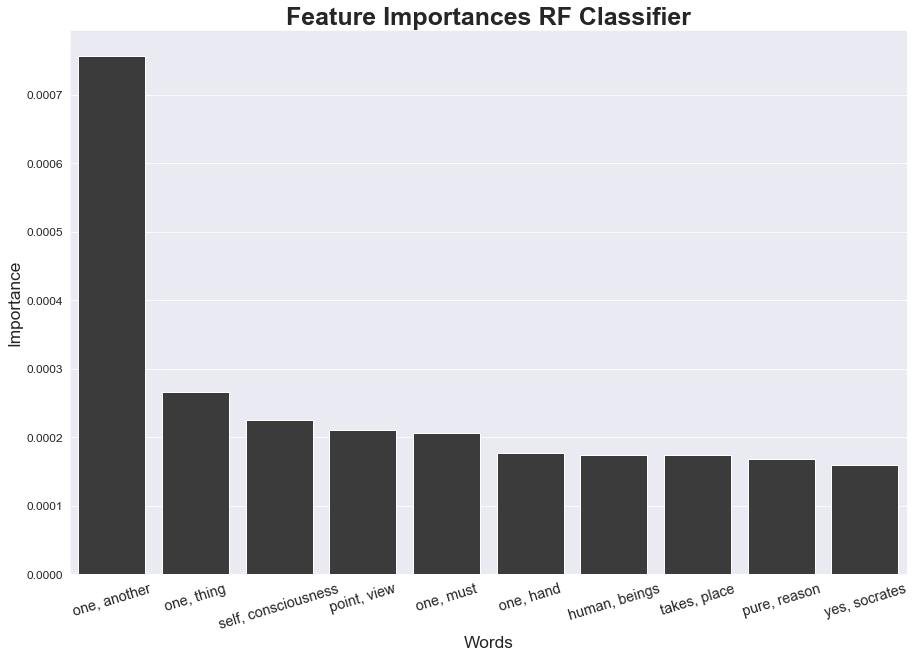

In [52]:
bigram_df = pd.DataFrame(bigrams_scored[:10], columns=['bigram', 'score'])
bigram_df['bigram'] = bigram_df['bigram'].apply(lambda x: ', '.join(x))

sns.set_style('darkgrid')
fig = plt.subplots(figsize=(15, 10))
sns.barplot(data=bigram_df, x='bigram', y='score', color='#3B3B3B')
plt.title('Feature Importances RF Classifier', size=25, fontweight='bold')
plt.xlabel('Words', size='xx-large')
plt.xticks(rotation=17, size='x-large')
plt.ylabel('Importance', size='xx-large')
plt.yticks(size='large')
plt.show()

While this isn't particularly informative, it does show us some common phrases used throughout the history of philosophy. It also helps us to understand why 'one' was such a common term - it is used in some transition phrases like or to denote other people. Note that because 'or' and other logical connectives are stopwords, the bigram 'one, another' indicates a number of different phrases ('one or another', 'one another', 'one and another'). 

Next we can create similar charts for each school to see which schools use which phrases preferentially.

In [53]:
bigram_dict = {}
for school in text_dict.keys():
    tokens = nltk.regexp_tokenize(text_dict[school], pattern)
    tokens_stopped = [x.lower() for x in tokens if x.lower() not in stopwords_list]
    measures = BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(tokens_stopped)
    scored = finder.score_ngrams(measures.raw_freq)
    bigram_dict[school] = scored


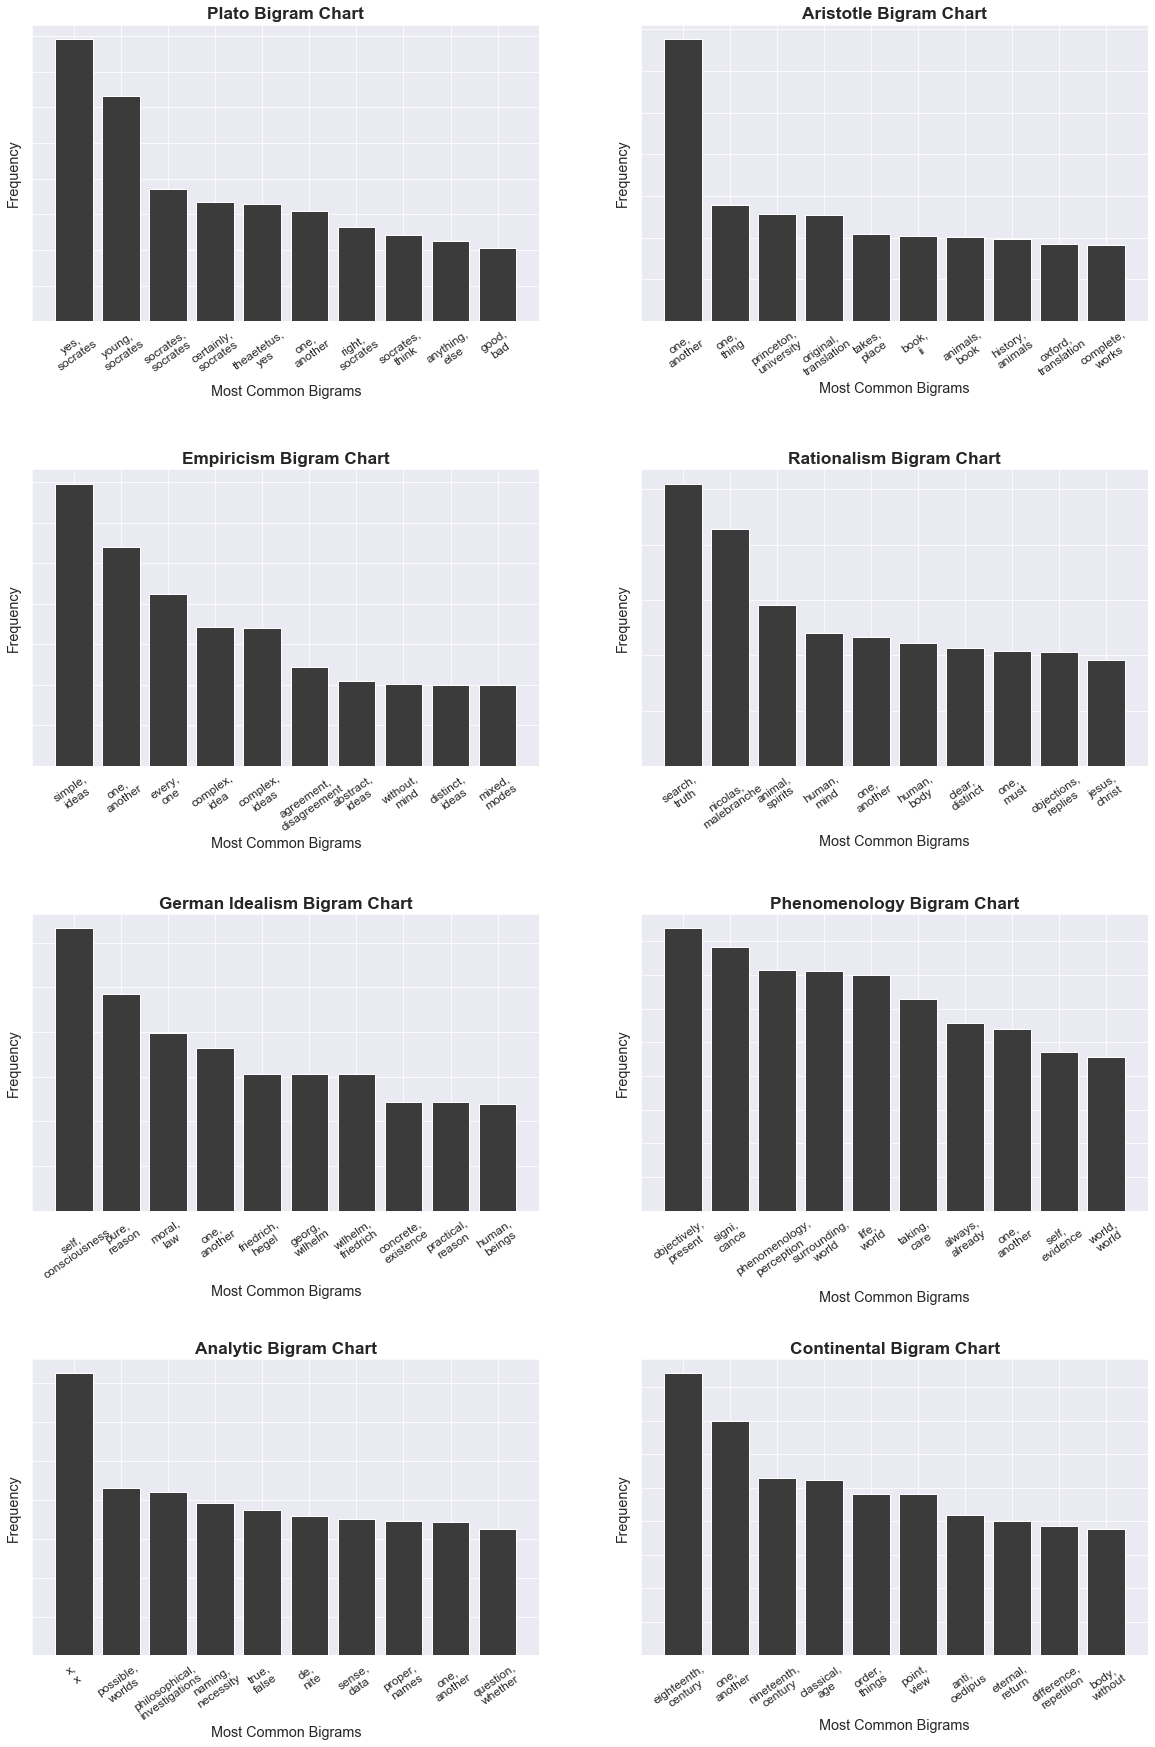

In [77]:
fig, axs = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(20, 30)
fig.subplots_adjust(wspace=0.2)
fig.subplots_adjust(hspace=0.5)

for school, ax in zip(bigram_dict.keys(), axs.flatten()):
    labels = [',\n'.join(x[0]) for x in bigram_dict[school][:10]]
    heights = [x[1] for x in bigram_dict[school][:10]]
    ax.bar(x=labels, height=heights, color='#3B3B3B')
    xlabels = labels
    ax.set_xticklabels(xlabels, rotation=35, size='large')
    ax.set_yticklabels(ax.get_yticklabels(), size='large')
    ax.set_xlabel('Most Common Bigrams', size='x-large')
    ax.set_ylabel('Frequency', size='x-large')
    ax.set_title(school.replace('_', ' ').title() + ' Bigram Chart', size='xx-large', fontweight='bold')
plt.show()

From this printout one can tell that certain artifacts of transforming pdfs to txt files have remained. One sees phrases that must be headings of pages (like the title of Malebranche's book *Search After Truth* or 'oxford', the translators of Aristotle's texts). The next cells aim to correct for this by eliminating specific stopwords for each school.

In [80]:
plato_stopwords = ['socrates', 'theaetetus', 'alcibiades', 'yes', 'clinias']
aristotle_stopwords = ['princeton', 'translation', 'ii', 'book', 'oxford', 'works', 'aristotle']
empiricism_stopwords = []
rationalism_stopwords = ['nicolas', 'replies', 'search', 'q', 'prop']
german_idealism_stopwords = ['elements', 'wilhelm', 'friedrich', 'georg', 'press']
phenomenology_stopwords = ['perception', 'signi']
analytic_stopwords = ['investigations', 'naming', 'x', 'nite']
continental_stopwords = ['seventeenth', 'eighteenth', 'nineteenth', 'classical', 'things', 'anti', 'difference', 'organs']

stopwords_dict = {'plato': plato_stopwords, 'aristotle': aristotle_stopwords, 'rationalism': rationalism_stopwords, 
                    'empiricism': empiricism_stopwords, 'german_idealism': german_idealism_stopwords, 'analytic': analytic_stopwords, 
                    'continental': continental_stopwords, 'phenomenology': phenomenology_stopwords}

In [81]:
bigram_dict_cleaned = {}
for school in text_dict.keys():
    tokens = nltk.regexp_tokenize(text_dict[school], pattern)
    tokens_stopped = [x.lower() for x in tokens if x.lower() not in (stopwords_list + stopwords_dict[school])]
    measures = BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(tokens_stopped)
    scored = finder.score_ngrams(measures.raw_freq)
    bigram_dict_cleaned[school] = scored

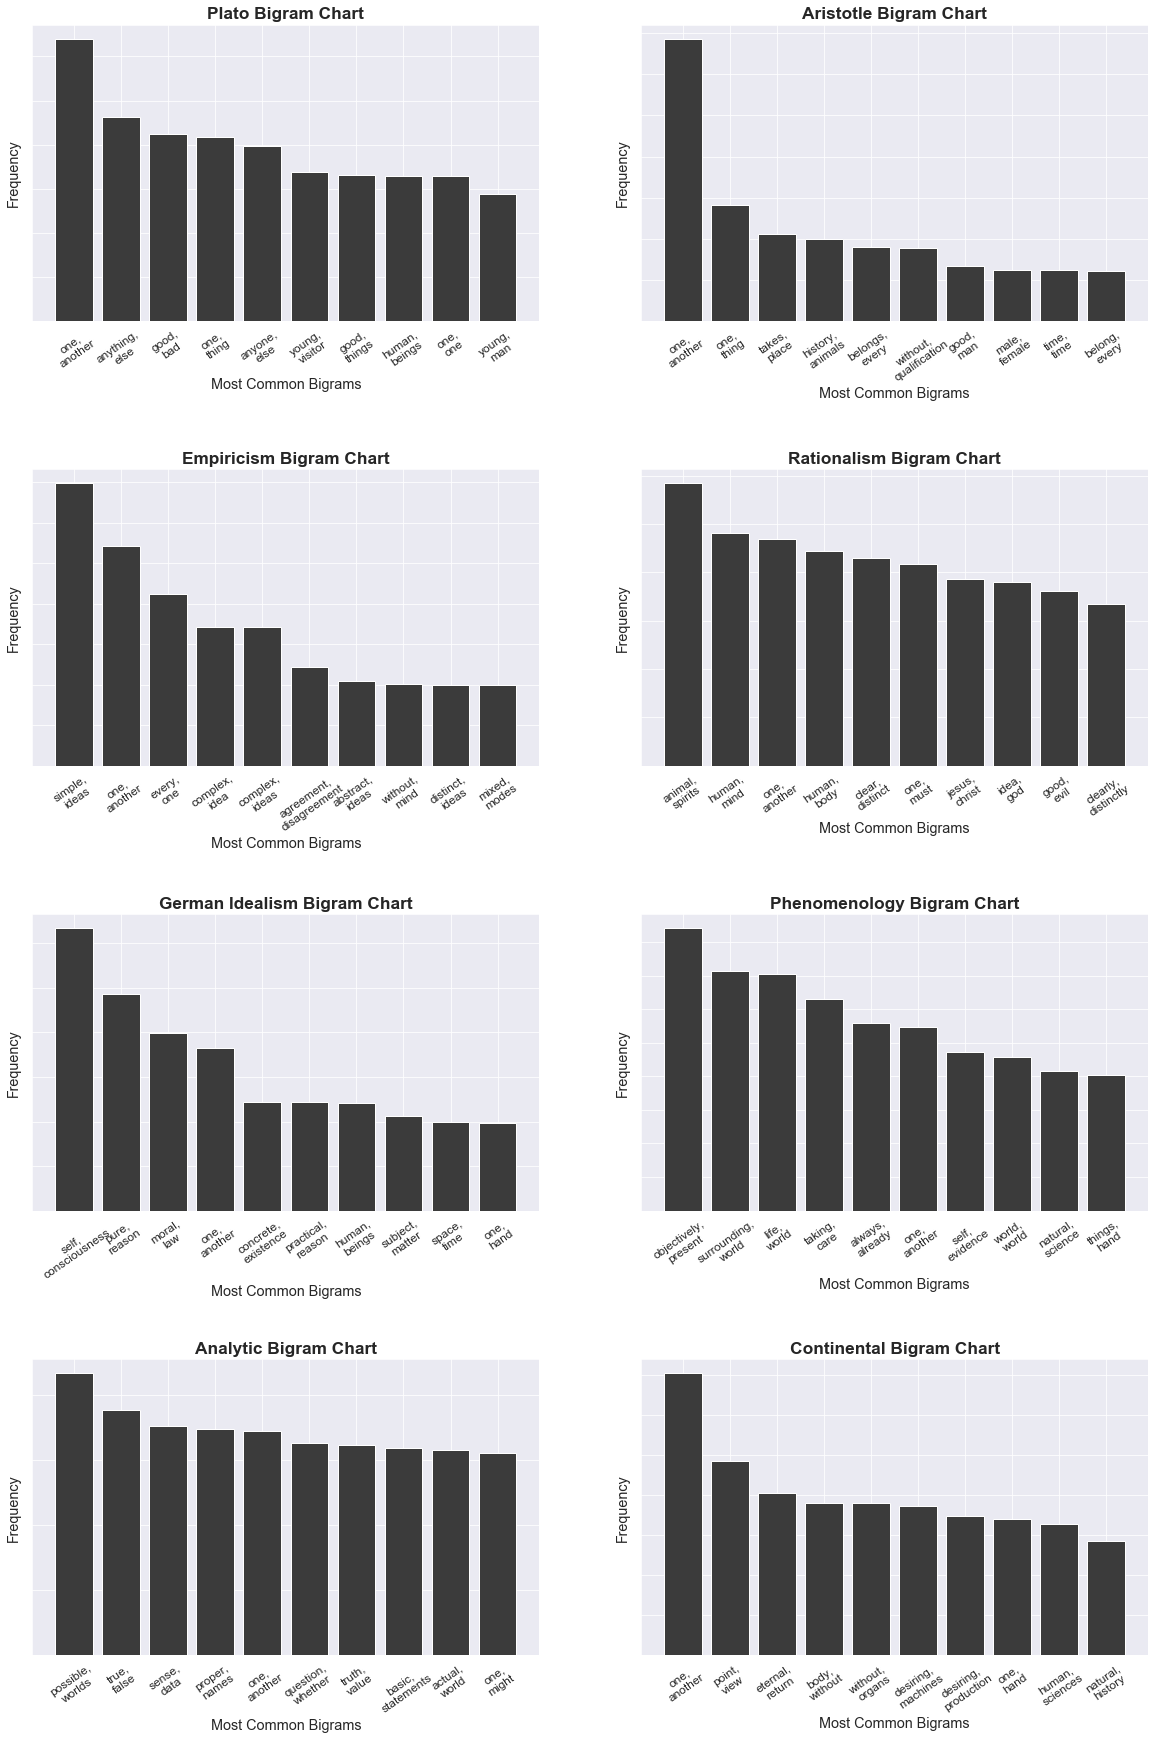

In [82]:
fig, axs = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(20, 30)
fig.subplots_adjust(wspace=0.2)
fig.subplots_adjust(hspace=0.5)

for school, ax in zip(bigram_dict_cleaned.keys(), axs.flatten()):
    labels = [',\n'.join(x[0]) for x in bigram_dict_cleaned[school][:10]]
    heights = [x[1] for x in bigram_dict_cleaned[school][:10]]
    ax.bar(x=labels, height=heights, color='#3B3B3B')
    xlabels = labels
    ax.set_xticklabels(xlabels, rotation=35, size='large')
    ax.set_yticklabels(ax.get_yticklabels(), size='large')
    ax.set_xlabel('Most Common Bigrams', size='x-large')
    ax.set_ylabel('Frequency', size='x-large')
    ax.set_title(school.replace('_', ' ').title() + ' Bigram Chart', size='xx-large', fontweight='bold')
plt.show()

Not bad! These bigrams actually give a solid sense of the key concepts of some of the schools. Rationalism's emphasis on 'clear and distinct ideas' and empiricism's focus on 'simple and complex ideas' are so forceful that both singular and plural versions of the phrases show up. Heidegger's common phrase 'always already' finds itself on the Phenomenology bigram list, and the German Idealist's continual discussion of self-consciousness is also evident. Aristotle and Plato's bigrams are harder to interpret, with Plato's being mostly common locutions from the dialogues rather than anything philosophically significant.

These could be explored further; perhaps it might be worthwhile to see what happens if we do some lemmatization. Still, this is a good start for now.

With these presented, we move on to examine word embeddings.

# Word 2 Vec Embeddings

To begin with we have to load our data and tokenize it.

In [85]:
with open('data.pkl', 'rb') as f:
    text_df = pickle.load(f)

text_df.sample(5)

,school,sentences
9094,plato,it’s the counterpart in the soulto pastry baki...
9850,phenomenology,it is here alone that geometrical idealization...
2455,aristotle,but that isnot so if it comes about not becau...
7281,analytic,the kinship is just as undeniable asthe differ...
39476,analytic,‘frege on demonstratives’ philosophical revie...


In [128]:
w2v_data = text_df['sentences'].map(word_tokenize)

In [353]:
w2v_data.sample(10)

31673    [certainlythat, is, a, condition, which, under...
11163    [first, the, typology, of, the, various, sound...
10236                    [in, what, sense, is, it, seeing]
9592     [one, imagines, the, willing, subject, here, a...
5661     [delirium, is, suppressed, asnon, being, in, t...
11000    [there, is, also, at, an, even, deeper, level,...
10600    [from, the, time, of, cantillon, and, even, be...
11666    [i, did, say, that, there, are, holes, in, the...
40164    [recall, the, karttunen, and, peters, algorith...
9807     [for, i, don, ’, t, suppose, that, it, ’, s, b...
Name: sentences, dtype: object

We see here a couple problems. First, some words appear to be fused together, probably because the transformation from pdf to txt did not register the space properly. Second, the sentences include words that are non-words like 'ct', 'v', or '"'. The former is hard to fix and we will just make do here, but the latter can be corrected for with some cleaning.

In [318]:
w2v_stopwords = ['"', 'ct', 'v', '”', 'co', "'", 'ff', 'ed', 'zu', 's', '’', 'ce', 'ff', 'der', 'nt', 'au', 'ality', 'ore',
                'ra', 'bee', 'usc', 'ts', 'ib', 'ad', 'n', 'vp', 'lt', 'st', 'ia', 'gen', 'ective', 'und', 'hoc', 'theb', 'rt',
                'fu', 'fl', 'bk', 'xxvi', 'xx', 'ﬀ', 'del', 'vo', 'bf', 'ul']
cleaned_w2v_data = []
for sentence in list(w2v_data):
    cleaned_sentence = [x.lower() for x in sentence if x.lower() not in w2v_stopwords]
    cleaned_w2v_data.append(cleaned_sentence)

In [379]:
model = Word2Vec(list(cleaned_w2v_data), size=700, window=5, min_count=15, workers=-1)

model.train(cleaned_w2v_data, total_examples=model.corpus_count, epochs=20)
wv = model.wv

In [382]:
# let's try it out!
wv.most_similar('body')

[('crude', 0.19981932640075684),
 ('feeding', 0.15544575452804565),
 ('derisory', 0.15379033982753754),
 ('adherence', 0.13229051232337952),
 ('theseare', 0.12931065261363983),
 ('descartes', 0.12789687514305115),
 ('underworld', 0.12603497505187988),
 ('thebelief', 0.12554487586021423),
 ('repetition', 0.12553635239601135),
 ('intermediary', 0.12505680322647095)]